# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importando archivo
df = pd.read_csv('/work/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')
df.head(4)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement


In [ ]:
#Revisando las columnas y su tipo
df.dtypes

Company                object
Sales                   int64
Stores                float64
Sales/Avg. Store      float64
Store Count Growth    float64
Category               object
dtype: object

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

#### Primero identifiquemos cuál es la compañía dominante:

In [ ]:
df['Sales'].max()

658119

#### La compañía dominante <font color='firebrick'> es Walmart</font>, ya que posee ventas por 658,119. Ahora saquemos el promedio excluyendola: 

In [ ]:
#Promedio de ventas excluyendo Walmart. 
df2 = df['Sales'].loc[df['Sales'] <658119]
prom_ventas = df2.mean()
prom_ventas.round(decimals=0)


46602.0

#### El promedio de ventas, sin contar Walmart es de <font color='firebrick'>46,602.</font>
#### En este gráfico lo podemos ver de manera más clara a través de la <font color='firebrick'>línea roja de en medio:

Text(50000.0, 13, 'Promedio de Ventas 46,602')

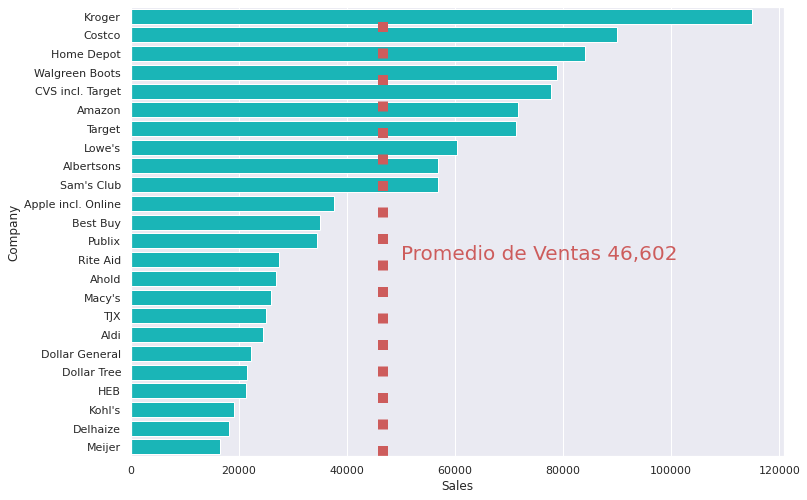

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df['Sales'][1:25], y= df['Company'][1:25], data=df, color = 'darkturquoise')
plt.axvline(x=df['Sales'][1:25].mean(), color= 'indianred', linewidth = 10, linestyle = 'dotted')
plt.text(50000.0,13,'Promedio de Ventas 46,602',rotation=0, size= 20, color= 'indianred')

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

#### Revisemoslo a través de un histograma:

<function matplotlib.pyplot.show(close=None, block=None)>

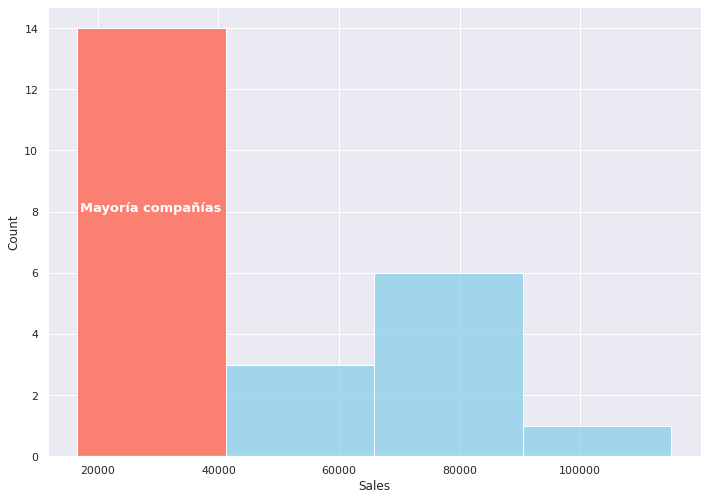

In [ ]:
ax = sns.histplot(x = 'Sales', data = df[1:25], bins = 4, color= 'skyblue')
ax.patches[0].set_facecolor('salmon')
plt.text(17000.0,8,'Mayoría compañías',rotation=0, size= 13, color= 'white', weight='bold')
plt.show

#### La mayoría de las compañías (14) generaron ventas por hasta  <font color='firebrick'>40,000 dólares.</font>

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

#### Primero revisamos la columna Stores, y descubrimos que hay valores nulos.
#### <font color='firebrick'>Limpiemos los valores nulos antes de hallar el resultado.</font>

In [ ]:
df.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              1
dtype: int64

In [ ]:
df3 = df.dropna()
df3.head(4)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Dollar Amount
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,"658,119"
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,"115,037"
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,"90,048"
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,"83,976"


#### Usemos un histograma para revisar:

<function matplotlib.pyplot.show(close=None, block=None)>

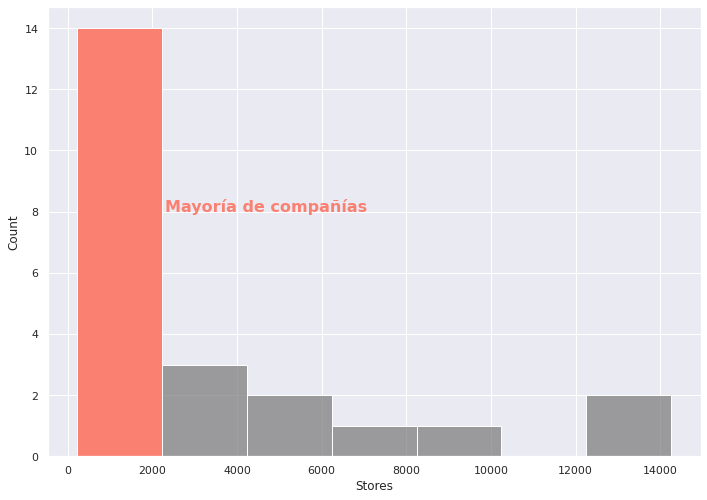

In [ ]:
ax = sns.histplot(x = 'Stores', data = df3, bins = 7, color= 'gray')
ax.patches[0].set_facecolor('salmon')
plt.text(2300.0,8,'Mayoría de compañías',rotation=0, size= 16, color= 'salmon', weight='bold')
plt.show

#### La mayoría de las compañías (14) tienen hasta <font color='firebrick'>2,000 tiendas.</font>

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

#### Hagamos un <font color='firebrick'>gráfico de dispersión</font> para revisar si existe alguna correlación.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


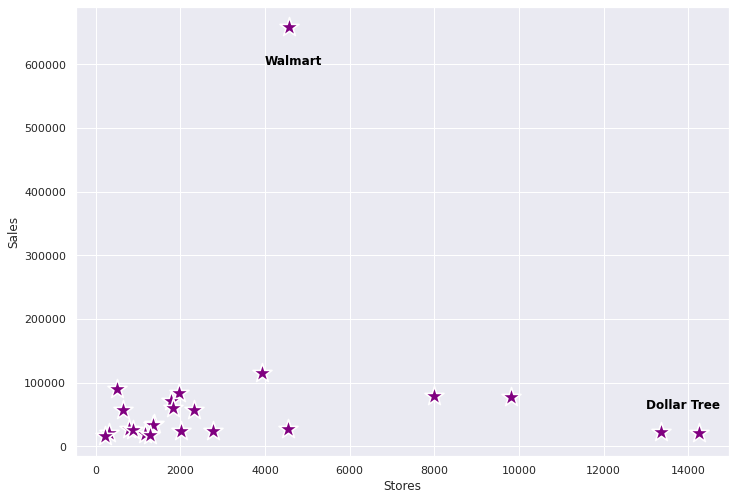

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(df3.Stores, df3.Sales,s = 400, color = 'purple', marker = '*' )
plt.text(4000,600000, "Walmart", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(13000,60000, "Dollar Tree", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()


#### - En el gráfico observamos que hay compañías con <font color='firebrick'>14,000 tiendas, como Dollar Tree y sus ventas son por menos de 100,000</font>. 
#### - Mientras que hay compañías como Walmart con 4,500 tiendas y 600,000 en Ventas.
#### - Por lo que aparentemente <font color='firebrick'>no hay relación entre Mayor tiendas, Mayor Ventas.</font> Sin embargo Walmart al ser una compañía muy grande nos puede sesgar los datos o entorpecer la vista.

<br>

#### Veamos ahora la misma gráfica sin incluir a <font color='firebrick'>Walmart.</font>

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


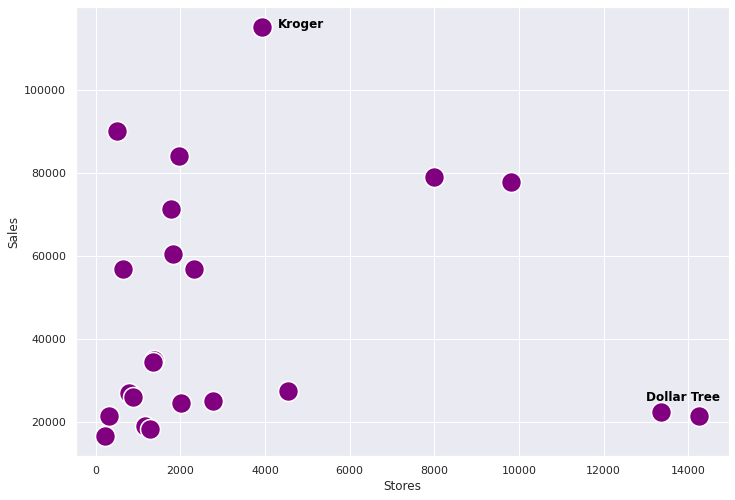

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(df3.Stores[1:], df3.Sales[1:], s = 400, color = 'purple')
plt.text(4300,115000, "Kroger", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(13000,25000, "Dollar Tree", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()


#### Vemos que una de las empresas con más  tiendas (14,000), Dollar Tree tiene alrededor de 20,000 en Ventas.
#### Mientras que Kroger con casi 4,00 tiendas posee más de 100,000 en Ventas
#### Concluímos en que <font color='firebrick'>no existe relación entre  'Mayor nro de Tiendas y mayor nro de Ventas'. </font>

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 5. ¿Cuál es el rango que existe entre las ventas?

#### El rango entre la compañía con más ventas (Walmart) y la que tiene menos ventas (Meijer) <font color='firebrick'> es de 641,527.</font>

In [ ]:
rango = df['Sales'].max() - df['Sales'].min()
rango

641527

#### El rango entre la <font color='firebrick'>segunda compañía </font>  <font color='black'>con más ventas (Kroger) y la que tiene menos ventas (Meijer) es de <font color='firebrick'>98,445.</font>

In [ ]:
rango2 = df['Sales'][1:].max() - df['Sales'].min()
rango2

98445

#### Viendolo en un gráfico, podemos corroborrar que el rango es abismal en ambos casos.

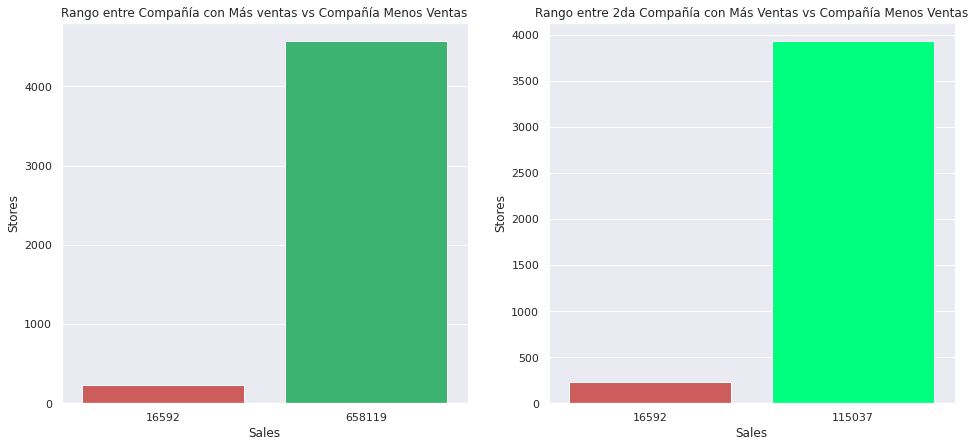

In [ ]:
f, axes = plt.subplots(1, 2,figsize = (16,7))
sns.barplot(x= (df['Sales'][0:25:24]), y='Stores', data=df, ax= axes[0])
axes[0].set_title('Rango entre Compañía con Más ventas vs Compañía Menos Ventas')
axes[0].patches[0].set_facecolor('indianred')
axes[0].patches[1].set_facecolor('mediumseagreen')

sns.barplot(x = (df['Sales'][1::23]), y='Stores', data=df, ax=axes[1])
axes[1].set_title('Rango entre 2da Compañía con Más Ventas vs Compañía Menos Ventas')
axes[1].patches[0].set_facecolor('indianred')
axes[1].patches[1].set_facecolor('springgreen')
plt.show()

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

#### Identicamos las 5 empresas con <font color='firebrick'> mayor cantidad de Tiendas:

In [ ]:
sort_by_stores = df3.sort_values('Stores', ascending=False)
top_five_stores=sort_by_stores.head(5)
top_five_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Dollar Amount
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,"21,464"
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,"22,234"
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,"77,792"
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,"78,924"
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,"658,119"


#### Identificamos ahora las 5 empresas con <font color='firebrick'> mayor cantidad de Ventas:

In [ ]:
#5 empresas con mayor cantidad de ventas
sort_by_sales = df.sort_values('Sales', ascending=False)
top_five_sales= sort_by_sales.head(5)
top_five_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


#### Ahora grafiquemos ambos resultados para ver si hay empresas en común

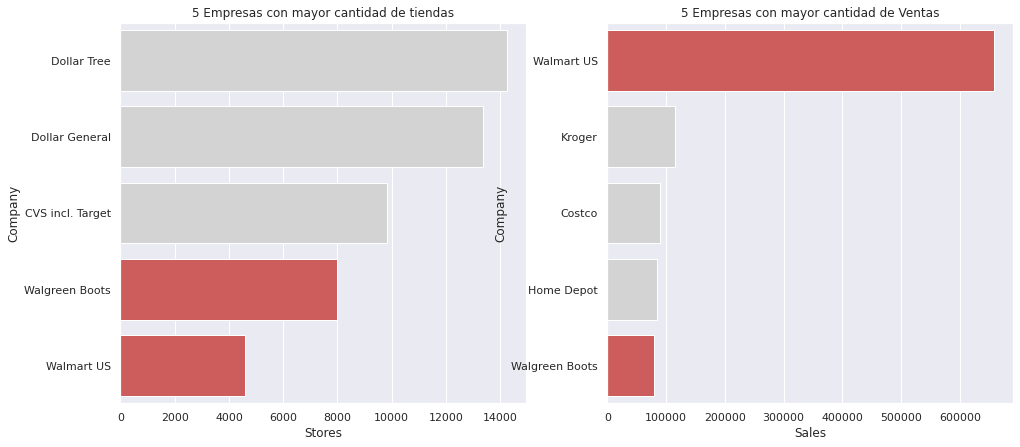

In [ ]:
f, axes = plt.subplots(1, 2,figsize = (16,7))
sns.barplot(x= top_five_stores['Stores'], y= 'Company', data= top_five_stores, ax= axes[0], color='lightgray')
axes[0].set_title('5 Empresas con mayor cantidad de tiendas')
axes[0].patches[3].set_facecolor('indianred')
axes[0].patches[4].set_facecolor('indianred')
sns.barplot(x= top_five_sales['Sales'], y= 'Company', data= top_five_sales, ax=axes[1], color='lightgray')
axes[1].set_title('5 Empresas con mayor cantidad de Ventas')
axes[1].patches[0].set_facecolor('indianred')
axes[1].patches[4].set_facecolor('indianred')
plt.show()

#### Como vemos en el gráfico hay 2 empresas que están dentro del ranking con más tiendas y con mayor cantidad de ventas:
####                           <font color='firebrick'> Walgreen Boots y Walmart US.</font>

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

#### Hagamos un gráfico donde se sumen las ventas por Categoría y veamos:

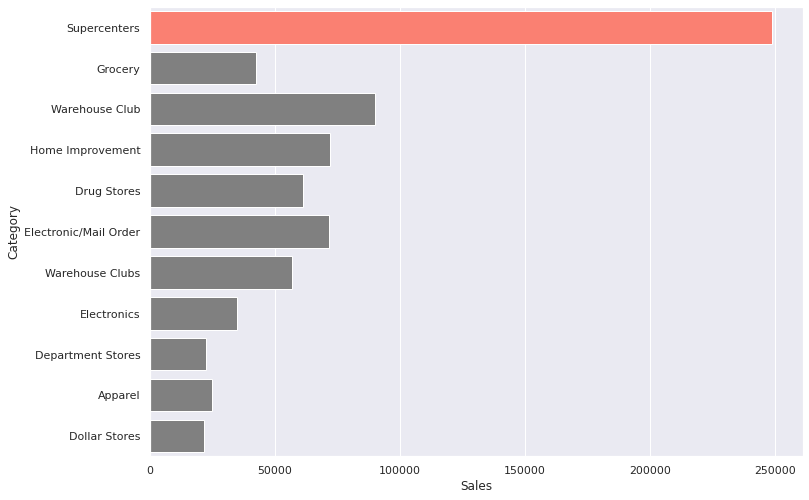

In [ ]:
ax = sns.barplot(y='Category', x='Sales', data=df, ci=None, color='gray')
ax.patches[0].set_facecolor('salmon')

#### ➡️ La categoría que generó más ventas fue <font color='firebrick'>  Supercenters, con 250k.

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
df5 = df3.sort_values('Sales/Avg. Store', ascending=False)
df5.head(3)


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Dollar Amount
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,"90,048"
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,"56,828"
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,"16,592"


#### La compañías que en relación con su cantidad de tiendas generán mas ventas son:
#### 1. Costco
#### 2. Sam's Club
#### 3. Meijer

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

#### Revisamos cuáles son las compañías que no poseen Tienda Física:  

In [ ]:

venta_online = df[df['Stores'].isnull()]
venta_online

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


#### Encontramos que son:  <font color = 'firebrick'> Amazón y Apple incl. Online </font>

#### Grafiquemos ahora para saber si sus ventas destacan sobre quienes tienen Tienda Física: 

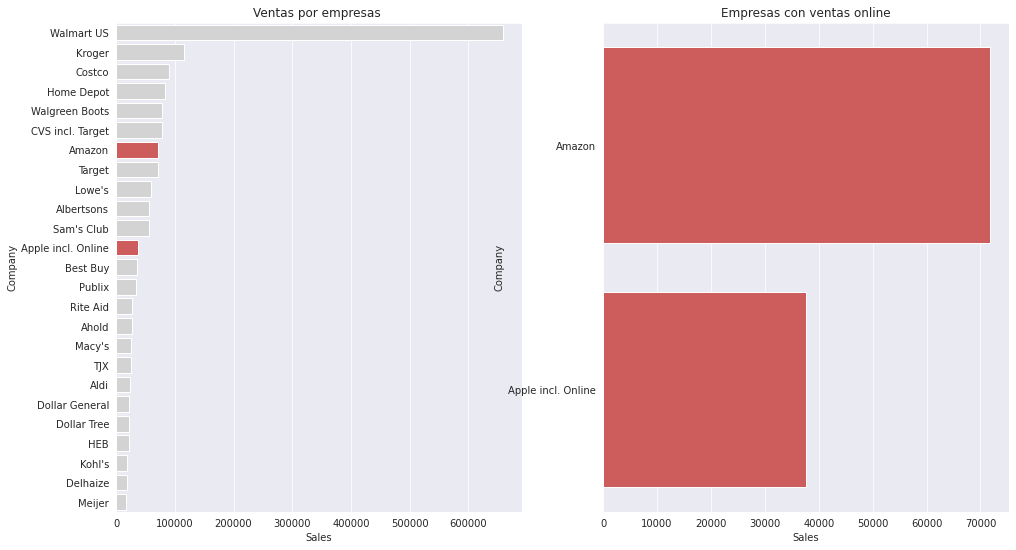

In [ ]:
f, axes = plt.subplots(1, 2,figsize = (16,9))
sns.barplot(x= df['Sales'], y= 'Company', data= df, ax= axes[0], color='lightgray')
axes[0].set_title('Ventas por empresas ')
axes[0].patches[6].set_facecolor('indianred')
axes[0].patches[11].set_facecolor('indianred')
sns.barplot(x= venta_online['Sales'], y= 'Company', data= venta_online, ax=axes[1], color='lightgray')
axes[1].set_title('Empresas con ventas online')
axes[1].patches[0].set_facecolor('indianred')
axes[1].patches[1].set_facecolor('indianred')
plt.show()


#### ➡️ Como vemos Apple está por <font color='firebrick'>encima de 13 compañías con Tienda Física. </font>
#### ➡️ Amazon está por <font color='firebrick'> encima de 18 compañías con Tienda Física.

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

## III. Tus propias preguntas

### 10. ¿Cuál es la compañía que más vendió en la categoría 'Grocery'?

#### Revisemos cuales son las compañías que pertenecen a la categoría <font color= 'firebrick'> Grocery:

In [ ]:
grocery_cat = df.loc[df['Category'] == 'Grocery']
grocery_cat

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Dollar Amount
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,"115,037"
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,"56,829"
13,Publix,34408,1351.0,25.997733,0.042438,Grocery,"34,408"
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,"26,903"
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,"24,402"
21,HEB,21384,323.0,66.825000,0.018927,Grocery,"21,384"
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery,"18,201"


#### Ahora grafiquemos las compañías de categoría <font color= 'firebrick'>Grocery </font>para ver cual vendió más:

<AxesSubplot:xlabel='Sales', ylabel='Company'>

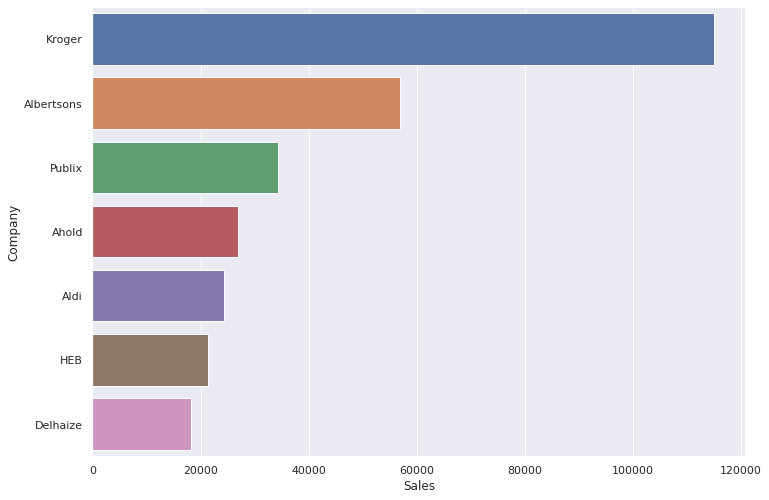

In [ ]:
sns.barplot( x= grocery_cat['Sales'], y = grocery_cat['Company'], data = grocery_cat)

#### ➡️ Como vemos <font color='firebrick'>Kroger </font> es la compañía con mayor cantidad de Ventas en la Categoría Grocery.

<br>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

### 11. ¿Cuál es la compañía que más vendió en la categoría 'Drugstore'?

#### Revisemos cuales son las compañías que venden en la categoría 'Drugstores': 

In [ ]:
drug_stores = df.loc[df['Category'] == 'Drug Stores']
drug_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Dollar Amount
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,"78,924"
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,"77,792"
14,Rite Aid,27486,4553.0,6.025649,-0.003720,Drug Stores,"27,486"


#### Ahora grafiquemos para hallar cuál vendió más:

<AxesSubplot:xlabel='Sales', ylabel='Company'>

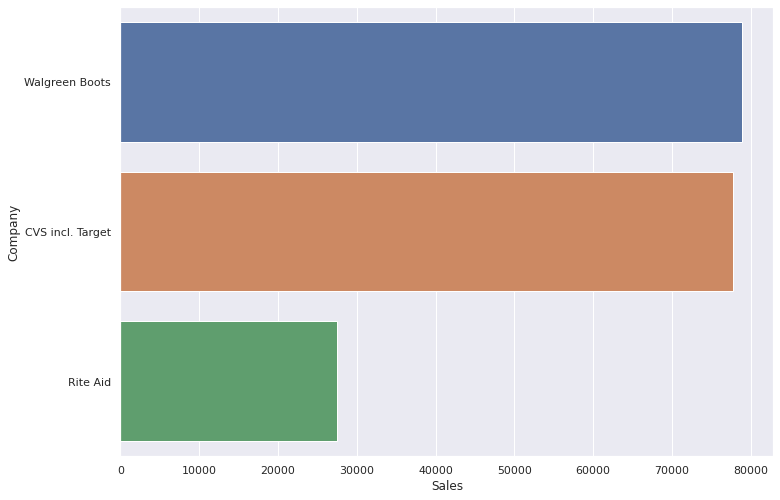

In [ ]:
sns.barplot( x= drug_stores['Sales'], y = drug_stores['Company'], data = drug_stores)

#### ➡️ Como vemos la compañía que más vendió dentro de la categoría Drug Stores es: <font color ='firebrick'> Walgreen Boots. </font> 
#### ➡️ Le sigue por muy cerca <font color = 'firebrick'> CVS incl. Target </font>

<hr style="height:1.5px;border-width:0;color:black;background-color:gray">

                                                                    Si llegaste hasta aquí, gracias por revisar el informe 😊
                                                                                                            Fernanda Arteaga

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2251fd77-bad9-4804-b50d-6d78247f75a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>